In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# import our data

# File paths
D1 = "QVI_purchase_behaviour.csv"
D2 = "QVI_transaction_data.xlsx"
D3 = "QVI_data.csv"

# Read data from CSV and Excel files
purchase_behaviour = pd.read_csv(D1)
transaction = pd.read_excel(D2)
store_performance = pd.read_csv(D3)  

# Print the data
print("Purchase Behaviour:")
print(purchase_behaviour.head())

print("\nTransaction Data:")
print(transaction.head())

print("\nStore Performance:")
print(store_performance.head())


In [ ]:
# Check for Missing Data
missing_data_1 = purchase_behaviour.isnull().sum()
missing_data_2 = transaction.isnull().sum()
missing_data_3 = store_performance.isnull().sum()
# Display  Missing Data
missing_data_1,missing_data_2,missing_data_3

In [ ]:
#merged dataset
merged_data = pd.merge(purchase_behaviour, transaction, on='LYLTY_CARD_NBR', how='inner')

# Remove duplicate entries
merged_data.drop_duplicates(inplace=True)

# Define the current order of columns
current_columns_order = list(merged_data.columns)

# Define the desired order of columns
columns_order = ['DATE', 'LYLTY_CARD_NBR', 'STORE_NBR','PROD_NBR','TXN_ID','PREMIUM_CUSTOMER','LIFESTAGE','PROD_NAME','PROD_QTY','TOT_SALES']

# Reorder the three specific columns
qvi_data = merged_data.reindex(columns=columns_order)

# Display the organized DataFrame
print(qvi_data)
qvi_data

In [ ]:
qvi_data.head(5)

In [44]:
store_performance.head(5)

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,month
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,10
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,9
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,3
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,3
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,11


In [ ]:
# Convert 'DATE' column to datetime format
qvi_data['DATE'] = pd.to_datetime(qvi_data['DATE'], origin='1900-01-01', unit='D')

print(qvi_data)

In [42]:
# Convert 'DATE' column to datetime format with custom format string
store_performance['DATE'] = pd.to_datetime(store_performance['DATE'], format='%Y-%m-%d')

# Analysis

In [49]:
# Find the minimum and maximum dates for our Previous data
min_date = qvi_data['DATE'].min()
max_date = qvi_data['DATE'].max()

# Print the range of time
print("Staring Date:", min_date)
print("Ending Date:", max_date)

Staring Date: 2018-07-03 00:00:00
Ending Date: 2019-07-02 00:00:00


In [48]:
# Find the minimum and maximum dates for our new data
min_date = store_performance['DATE'].min()
max_date = store_performance['DATE'].max()

# Print the range of time
print("Staring Date:", min_date)
print("Ending Date:", max_date)


Staring Date: 2018-07-01 00:00:00
Ending Date: 2019-06-30 00:00:00


In [55]:
# Containing the sales data

# Calculate total sales revenue
total_sales_revenue = store_performance['TOT_SALES'].sum()

# Print the total sales revenue
print("Total Sales Revenue:", total_sales_revenue)


Total Sales Revenue: 1933114.9999999998


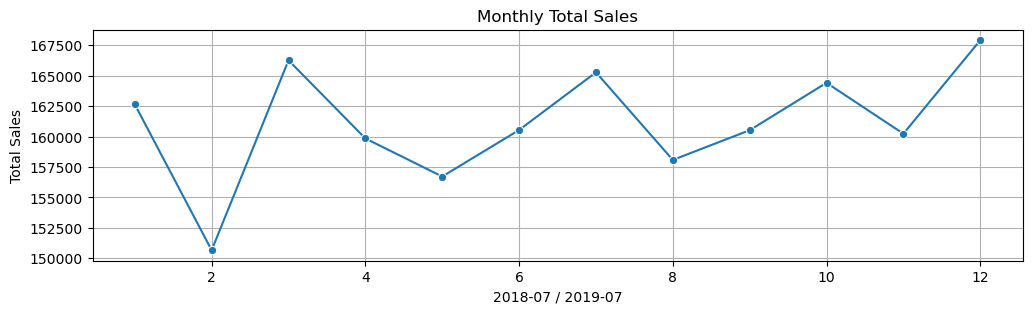

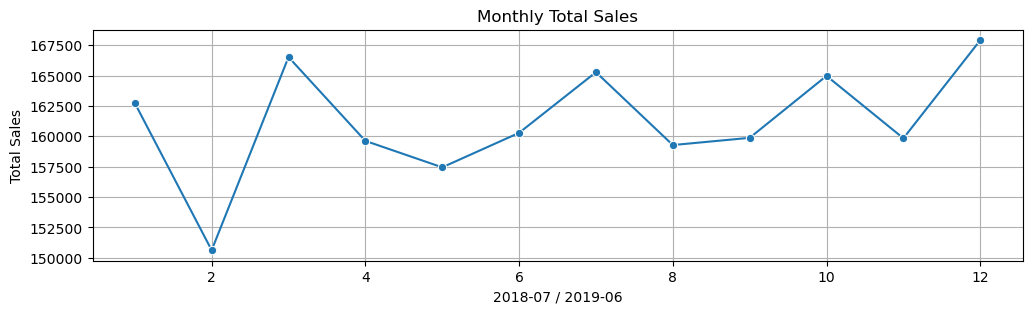

In [57]:
# Analysis Monthly Total Sales Between 2018-07 / 2019-07
store_performance['month'] = store_performance['DATE'].dt.month
monthly_sales = store_performance.groupby('month')['TOT_SALES'].sum()
plt.figure(figsize=(12, 3))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.title('Monthly Total Sales')
plt.xlabel('2018-07 / 2019-07')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


# Analysis Monthly Total Sales Between 2018-07 / 2019-06
qvi_data['month'] = qvi_data['DATE'].dt.month
monthly_sales = qvi_data.groupby('month')['TOT_SALES'].sum()
plt.figure(figsize=(12, 3))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.title('Monthly Total Sales')
plt.xlabel('2018-07 / 2019-06')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

In [59]:
# Calculate total number of customers
total_customers = store_performance['LYLTY_CARD_NBR'].nunique()

# Print
print("Total Number of Customers:", total_customers)


Total Number of Customers: 72636


In [60]:
# number of transactions
total_transactions = len(store_performance)

# number of customers
total_customers = store_performance['LYLTY_CARD_NBR'].nunique()

# number of transactions per customer
average_transactions_per_customer = total_transactions / total_customers

# Print
print("Average number of transactions per customer:", average_transactions_per_customer)


Average number of transactions per customer: 3.646043284321824


In [61]:
## verage number of transactions per customer
# Calculate the number of transactions per customer
transactions_per_customer = store_performance.groupby('LYLTY_CARD_NBR')['TXN_ID'].nunique()

# Calculate the average number of transactions per customer
average_transactions_per_customer = transactions_per_customer.mean()

# Print the average number of transactions per customer
print("Average number of transactions per customer:", average_transactions_per_customer)


Average number of transactions per customer: 3.6225425408888157


In [69]:
sales_data = store_performance

# Define control store numbers
trial_stores = [77, 86, 88]
control_stores = {77: [86, 88], 86: [77, 88], 88: [77, 86]}

# Calculate total sales for trial and control stores
trial_sales = {}
control_sales = {}

for trial_store in trial_stores:
    trial_sales[trial_store] = sales_data[sales_data['STORE_NBR'] == trial_store]['TOT_SALES'].sum()
    control_sales[trial_store] = sum(sales_data[sales_data['STORE_NBR'] == control_store]['TOT_SALES'].sum() 
                                     for control_store in control_stores[trial_store])


for trial_store in trial_stores:
    print(f"Trial Store {trial_store}:")
    print(f"Total Sales: {trial_sales[trial_store]}")
    print(f"Total Sales of Control Stores: {control_sales[trial_store]}")
    print(f"Percentage Difference: {100 * (trial_sales[trial_store] - control_sales[trial_store]) / control_sales[trial_store]:.2f}%\n")


Trial Store 77:
Total Sales: 3040.0
Total Sales of Control Stores: 26968.6
Percentage Difference: -88.73%

Trial Store 86:
Total Sales: 10635.35
Total Sales of Control Stores: 19373.25
Percentage Difference: -45.10%

Trial Store 88:
Total Sales: 16333.25
Total Sales of Control Stores: 13675.35
Percentage Difference: 19.44%



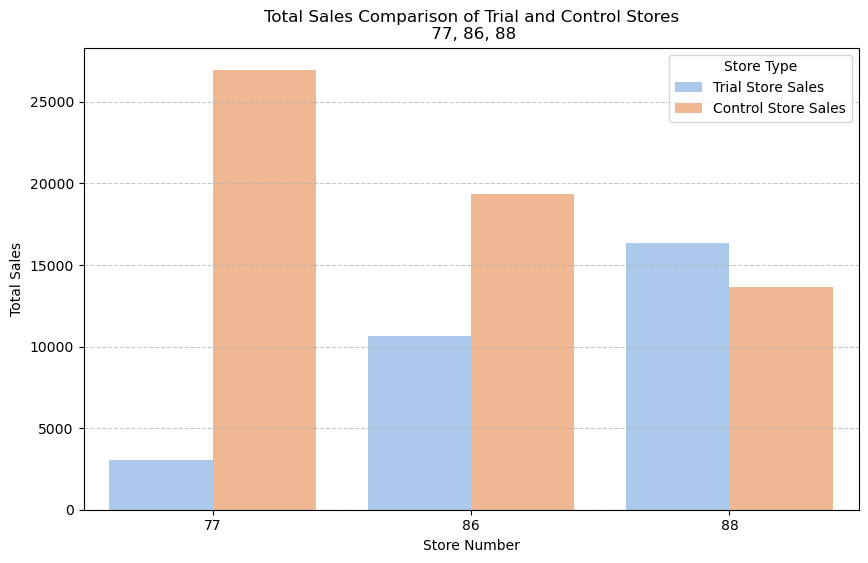

In [74]:
sales_data = store_performance

# Df control store numbers
trial_stores = [77, 86, 88]
control_stores = {77: [86, 88], 86: [77, 88], 88: [77, 86]}

# Calculate total sales for trial and control stores
trial_sales = {}
control_sales = {}

for trial_store in trial_stores:
    trial_sales[trial_store] = sales_data[sales_data['STORE_NBR'] == trial_store]['TOT_SALES'].sum()
    control_sales[trial_store] = sum(sales_data[sales_data['STORE_NBR'] == control_store]['TOT_SALES'].sum() 
                                     for control_store in control_stores[trial_store])

# DataFrame for visualization
data = pd.DataFrame({
    'Store Number': trial_stores,
    'Trial Store Sales': list(trial_sales.values()),
    'Control Store Sales': list(control_sales.values())
})

# DataFrame to long format for seaborn
data_melted = data.melt(id_vars='Store Number', var_name='Store Type', value_name='Total Sales')

# Create visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=data_melted, x='Store Number', y='Total Sales', hue='Store Type', palette='pastel')
plt.xlabel('Store Number')
plt.ylabel('Total Sales')
plt.title('Total Sales Comparison of Trial and Control Stores\n 77, 86, 88')
plt.legend(title='Store Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [89]:
customer_purchases_ = store_performance

# Df trial period for each trial store
trial_period = {'Trial_Store_77': ('2019-01-01', '2019-06-30'),
                'Trial_Store_86': ('2019-02-01', '2019-07-31'),
                'Trial_Store_88': ('2019-03-01', '2019-08-31')}

# Calculate total number of customers, total sales, and average transaction value for each period
metrics_before = {}
metrics_after = {}

for store, period in trial_period.items():
    before_trial_data = customer_purchases_[(customer_purchases_['STORE_NBR'] == int(store.split('_')[-1])) & 
                                   (customer_purchases_['DATE'] < period[0])]
    after_trial_data = customer_purchases_[(customer_purchases_['STORE_NBR'] == int(store.split('_')[-1])) & 
                                  (customer_purchases_['DATE'] >= period[0]) & (customer_purchases_['DATE'] <= period[1])]
    
    # Calculate metrics for before trial period
    total_customers_before = before_trial_data['LYLTY_CARD_NBR'].nunique()
    total_sales_before = before_trial_data['TOT_SALES'].sum()
    avg_transaction_value_before = total_sales_before / len(before_trial_data)
    
    # Calculate metrics for after trial period
    total_customers_after = after_trial_data['LYLTY_CARD_NBR'].nunique()
    total_sales_after = after_trial_data['TOT_SALES'].sum()
    avg_transaction_value_after = total_sales_after / len(after_trial_data)
    
    # Store metrics in dictionaries
    metrics_before[store] = {
        'Total_Customers': total_customers_before,
        'Total_Sales': total_sales_before,
        'Avg_Transaction_Value': avg_transaction_value_before
    }
    
    metrics_after[store] = {
        'Total_Customers': total_customers_after,
        'Total_Sales': total_sales_after,
        'Avg_Transaction_Value': avg_transaction_value_after
    }

# Print the metrics before and after the trial period
for store, metrics in metrics_before.items():
    print(f"Trial Store: {store}")
    print("Metrics Before Trial Period:")
    print(f"Total Customers: {metrics['Total_Customers']}")
    print(f"Total Sales: {metrics['Total_Sales']}")
    print(f"Avg. Transaction Value: {metrics['Avg_Transaction_Value']}\n")

for store, metrics in metrics_after.items():
    print(f"Trial Store: {store}")
    print("Metrics After Trial Period:")
    print(f"Total Customers: {metrics['Total_Customers']}")
    print(f"Total Sales: {metrics['Total_Sales']}")
    print(f"Avg. Transaction Value: {metrics['Avg_Transaction_Value']}\n")


Trial Store: Trial_Store_77
Metrics Before Trial Period:
Total Customers: 215
Total Sales: 1494.6
Avg. Transaction Value: 5.376258992805755

Trial Store: Trial_Store_86
Metrics Before Trial Period:
Total Customers: 254
Total Sales: 6119.85
Avg. Transaction Value: 6.938605442176871

Trial Store: Trial_Store_88
Metrics Before Trial Period:
Total Customers: 382
Total Sales: 10753.8
Avg. Transaction Value: 8.700485436893203

Trial Store: Trial_Store_77
Metrics After Trial Period:
Total Customers: 220
Total Sales: 1545.4
Avg. Transaction Value: 5.422456140350877

Trial Store: Trial_Store_86
Metrics After Trial Period:
Total Customers: 249
Total Sales: 4515.5
Avg. Transaction Value: 6.883384146341464

Trial Store: Trial_Store_88
Metrics After Trial Period:
Total Customers: 292
Total Sales: 5579.450000000001
Avg. Transaction Value: 8.758948194662482



In [103]:
#  Df Trial store names
trial_stores = ['Trial_Store_77', 'Trial_Store_86', 'Trial_Store_88']

# Df metric names
metrics = ['Total_Customers', 'Total_Sales', 'Avg_Transaction_Value']

# Df labels for the plots
labels = {'Total_Customers': 'Total Customers',
          'Total_Sales': 'Total Sales',
          'Avg_Transaction_Value': 'Avg. Transaction Value'}

# Empty list to store DataFrame for each trial store
dfs = []

# Df DataFrame for each trial store
for trial_store in trial_stores:
   
    before_data = pd.DataFrame({'Store': trial_store, 'Period': 'Before', 'Metric': labels.values()})
    before_data['Value'] = [metrics_before[trial_store][metric] for metric in metrics]
    
    after_data = pd.DataFrame({'Store': trial_store, 'Period': 'After', 'Metric': labels.values()})
    after_data['Value'] = [metrics_after[trial_store][metric] for metric in metrics]
    
    # Concatenate before and after data
    store_data = pd.concat([before_data, after_data], ignore_index=True)
    dfs.append(store_data)

# Concatenate data for all trial stores
before_after_metrics = pd.concat(dfs, ignore_index=True)

# Plotly Express for  bar plot
fig = px.bar(before_after_metrics, x='Metric', y='Value', color='Period', barmode='group',
             facet_col='Store', category_orders={'Metric': list(labels.values())},
             labels={'Value': 'Metric Value'}, height=600, width=1000)

# Customize layout
fig.update_layout(title='Metrics Before and After Trial Period',
                  xaxis_title='Metric', yaxis_title='Value', legend_title='Period')

# Show 
fig.show()
